# Робастная оценка и $\chi^2$ тесты

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Пример распределения богатства

In [3]:
data = stats.norm.rvs(100000,30000,98 )

In [4]:
data = np.append(data,[1e9,1e9])

In [5]:
data.mean()

20100943.481615

Среднее значение не очень хорошо для описания этой ситуации

Text(0.5, 0, 'Логаритм богатства')

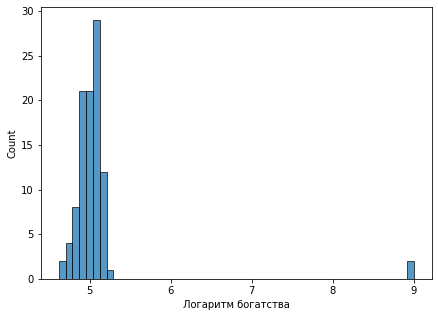

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(np.log10(data))
ax.set_xlabel('Логаритм богатства')
#fig.savefig('wealth_demo.png')

Строим медиану

In [7]:
data.sort()

In [8]:
data.sort()

In [9]:
len(data)

100

In [10]:
median = 0.5*(data[50]+data[51])

In [11]:
median

105642.83497656875

Text(0.5, 0, 'Логаритм богатства')

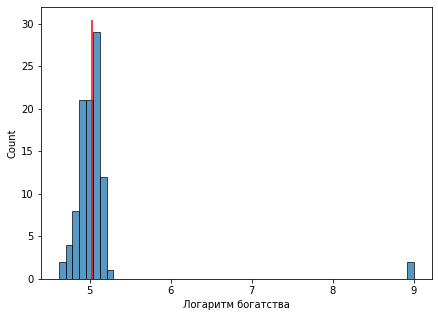

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(np.log10(data))
ylims = ax.get_ylim()
plt.vlines(x=np.log10(median),ymin=0,ymax=ylims[-1],color='red')
ax.set_xlabel('Логаритм богатства')
#fig.savefig('wealth_demo_med.png')

Строим Trimmed mean 5%

In [13]:
k = 0.05*len(data)

In [14]:
k

5.0

In [15]:
data_trimmed = data[6:96]

In [16]:
len(data_trimmed)

90

In [17]:
mean_t = data_trimmed.mean()

In [18]:
mean_t

105022.032027675

In [19]:
median

105642.83497656875

Text(0.5, 0, 'Логаритм богатства')

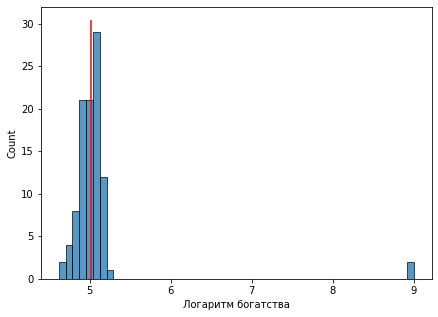

In [20]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(np.log10(data))
ylims = ax.get_ylim()
plt.vlines(x=np.log10(mean_t),ymin=0,ymax=ylims[-1],color='red')
ax.set_xlabel('Логаритм богатства')
#fig.savefig('wealth_demo_trim.png')

### Интерквартальный размах и абсолютное отклонение медианы

In [21]:
stats.iqr(data, scale='normal')

33376.374930005506

In [22]:
lower = np.quantile(data, 0.25)
print(lower)

78703.97520686145


In [23]:
upper = np.quantile(data, 0.75)
print(upper)

123728.0207848418


In [24]:
mid = (upper-lower)/2 + lower

In [25]:
mid

101215.99799585162

In [26]:
iqr = ((upper-lower)/1.349)

In [27]:
print(iqr)

33375.867737568835


In [28]:
mad = stats.median_absolute_deviation(data)

In [29]:
mad

30067.072529201476

In [30]:
median = np.median(data)

In [31]:
median

105504.73231821803

In [32]:
mad = np.median(np.abs(data-median))

In [33]:
mad

20279.962585458976

In [34]:
mad/0.6745

30066.66061595104

In [35]:
mad = stats.median_absolute_deviation(data)

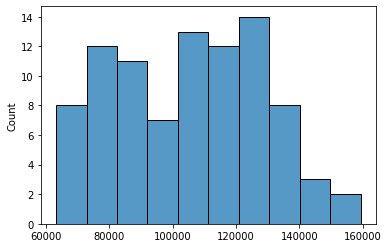

In [36]:
sns.histplot(data_trimmed,bins=10)

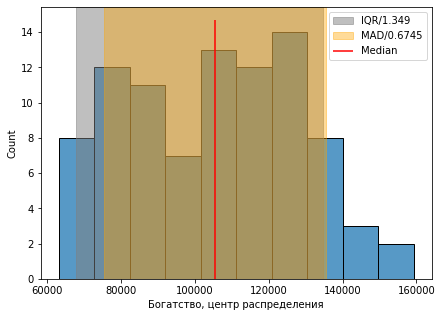

In [37]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data_trimmed,bins=10)
ylims = ax.get_ylim()
plt.vlines(x=median,ymin=0,ymax=ylims[-1],color='red', label='Median')
ax.axvspan(mid-iqr, mid+iqr, alpha=0.5, color='gray', label='IQR/1.349')
ax.axvspan(median-mad, median+mad, alpha=0.4, color='orange',label='MAD/0.6745')
ax.set_xlabel('Богатство, центр распределения')
plt.legend()
#fig.savefig('wealth_demo_scele.png')

Пример: что это значит для нормального распределения

In [38]:
data2 = stats.norm.rvs(100000,30000,1000)

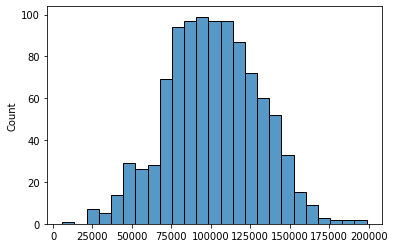

In [39]:
sns.histplot(data2)

In [40]:
lower2 = np.quantile(data2, 0.25)
print(lower)

upper2 = np.quantile(data2, 0.75)
print(upper)

mid2 = (upper2-lower2)/2 + lower2

print(mid2)
iqr2= ((upper2-lower2)/1.349)

78703.97520686145
123728.0207848418
101558.1940317424


In [41]:
mad2 = stats.median_absolute_deviation(data2)

In [42]:
median2 = np.median(data2)

In [43]:
print(mad2)

29670.007210492142


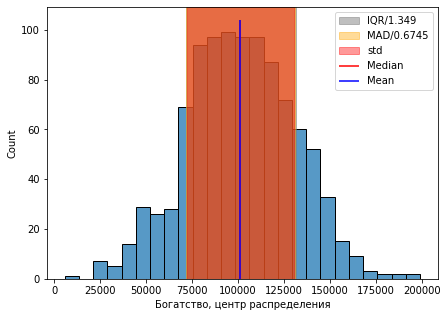

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data2)
ylims = ax.get_ylim()
plt.vlines(x=median2,ymin=0,ymax=ylims[-1],color='red', label='Median')
plt.vlines(x=np.mean(data2),ymin=0,ymax=ylims[-1],color='blue', label='Mean')
ax.axvspan(mid2-iqr2, mid2+iqr2, alpha=0.5, color='gray', label='IQR/1.349')
ax.axvspan(median2-mad2, median2+mad2, alpha=0.4, color='orange',label='MAD/0.6745')
ax.axvspan(np.mean(data2)-np.std(data2), np.mean(data2)+np.std(data2), alpha=0.4, color='red',label='std')
ax.set_xlabel('Богатство, центр распределения')
plt.legend()
fig.savefig('normal_demo_scele.png')

In [45]:
np.std(data2)

29191.49452896583

In [46]:
mad2

29670.007210492142

## $\chi^2$ Тест

In [49]:
df=10

In [50]:
alpha = 0.05

In [51]:
stats.chi2.ppf(0.95, df)

18.307038053275146

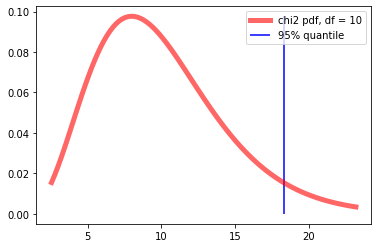

In [52]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.chi2.ppf(0.01, df),
                stats.chi2.ppf(0.99, df), 100)
ylims = ax.get_ylim()
ax.plot(x, stats.chi2.pdf(x, df),
        'r-', lw=5, alpha=0.6, label='chi2 pdf, df = 10')
plt.vlines(x=stats.chi2.ppf(0.95, df),ymin=0,ymax=stats.chi2.pdf(x, df).max(),color='blue', label='95% quantile')
plt.legend()
#plt.savefig('chisquare_ex.png')

$\chi^2$ для df=2

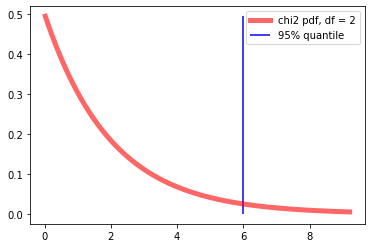

In [53]:
df=2
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.chi2.ppf(0.01, df),
                stats.chi2.ppf(0.99, df), 100)
ylims = ax.get_ylim()
ax.plot(x, stats.chi2.pdf(x, df),
        'r-', lw=5, alpha=0.6, label='chi2 pdf, df = 2')
plt.vlines(x=stats.chi2.ppf(0.95, df),ymin=0,ymax=stats.chi2.pdf(x, df).max(),color='blue', label='95% quantile')
plt.legend()
#plt.savefig('chisquare_ex_2.png')

In [54]:
(104-189/3)**2/189/3 + (75-189/3)**2/189/3 + (10-189/3)**2/189/3

8.172839506172838

In [55]:
stats.chi2.cdf(0.667,df=2)

0.2835881013600354

### $\chi^^2$ Тест проверка на адекватность, точная модель

In [56]:
data_balls = np.array( [2.88,
3.36
,3.50
,3.73
,3.74
,3.82
,3.88
,3.95
,3.95
,3.99
,4.02
,4.22
,4.23
,4.23
,4.23
,4.43
,4.53
,4.59
,4.66
,4.66
,4.85
,4.85
,5.16])

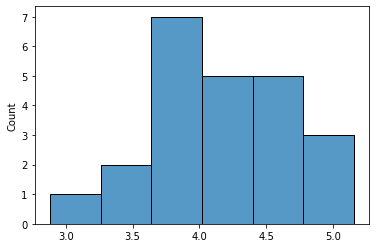

In [57]:
sns.histplot(data_balls)
#plt.savefig('chi_ex_model1.png')

In [58]:
quantiles = stats.norm.ppf([0.25, 0.5, 0.75, 0.99],loc=3.912, scale=0.5)

In [59]:
quantiles

array([3.57475512, 3.912     , 4.24924488, 5.07517394])

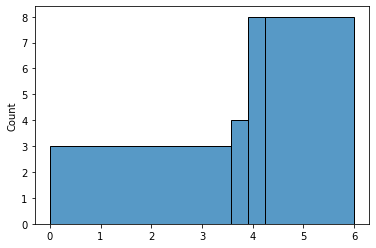

In [60]:
sns.histplot(data_balls,bins=[0,3.57475512, 3.912     , 4.24924488,6])
#plt.savefig('chi_ex_model2.png')

In [61]:
1-stats.chi2.cdf(3.609, df=3)

0.3068979083596164